In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import json


import torch

from rmrl.nn.pretraining import RMGraphGenerator, HighestValueNet, RMGNNTrainer


NUM_PROPS = 3
MAX_NODES = 6
BATCH_SIZE = 8
SEED = 42

from pathlib import Path
save_dir = Path(f'grpt_model/{NUM_PROPS}_props/')
save_dir.mkdir()

In [2]:
torch.manual_seed(SEED)
rm_gen = RMGraphGenerator(NUM_PROPS, MAX_NODES, batch_size=BATCH_SIZE, seed=SEED)
model = HighestValueNet(input_size=rm_gen.graph_space.nf_space.n)
trainer = RMGNNTrainer(rm_gen, model)

In [3]:
history = trainer.train(10_000, 1e-3)

  0%|          | 0/10000 [00:00<?, ?it/s]

iteration   100
train loss: 0.37749698758125305
eval loss:  0.3464449942111969

iteration   200
train loss: 0.19348308444023132
eval loss:  0.1980610191822052

iteration   300
train loss: 0.15281707048416138
eval loss:  0.07796155661344528

iteration   400
train loss: 0.12701015174388885
eval loss:  0.029531465843319893

iteration   500
train loss: 0.015078277327120304
eval loss:  0.027365194633603096

iteration   600
train loss: 0.02746163308620453
eval loss:  0.03170926123857498

iteration   700
train loss: 0.015056964941322803
eval loss:  0.01249528769403696

iteration   800
train loss: 0.011968957260251045
eval loss:  0.0036509172059595585

iteration   900
train loss: 0.007988596335053444
eval loss:  0.003121941350400448

iteration   1000
train loss: 0.007884564809501171
eval loss:  0.008318617008626461

iteration   1100
train loss: 0.004806059878319502
eval loss:  0.006662908475846052

iteration   1200
train loss: 0.004149107728153467
eval loss:  0.0031164675019681454

iteration  

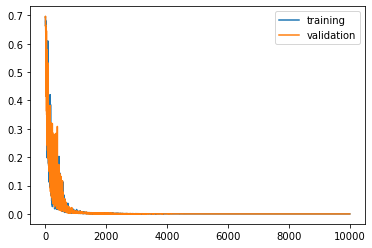

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history['iteration'], history['training_loss'], label='training')
plt.plot(history['iteration'], history['validation_loss'], label='validation')
plt.legend()

In [5]:
torch.save(trainer.model.state_dict(), save_dir / 'full')
torch.save(trainer.model.gnn.state_dict(), save_dir / 'gnn')
torch.save(trainer.model.rnn.state_dict(), save_dir / 'rnn')
with open(save_dir / 'history.json', 'w') as f:
    json.dump(history, f)